In [1]:
import numpy as np 
import pandas as pd 
import re
import json

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#!pip install emoji --upgrade
import emoji

#!pip install tweet-preprocessor
import preprocessor as p

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [1]:
!pip install emoji --upgrade

     |████████████████████████████████| 197 kB 1.5 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193003 sha256=ba15f8a49d31d5c930b174ee4ce5307fd0e1f0b30ce04ba35a450c89c8c6fa13
  Stored in directory: /Users/jaymeeliu/Library/Caches/pip/wheels/23/a5/a8/e74bad1ceced228b6ae94dcbacc5c67df6486fd1620714e7d1
Successfully built emoji
You should consider upgrading via the '/Users/jaymeeliu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install tweet-preprocessor

You should consider upgrading via the '/Users/jaymeeliu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
all_files = []
for dirname, _, filenames in os.walk('/Users/olgapodolska/Desktop/UA_War_my/input/'):
    for filename in filenames:
        full_path=os.path.join(dirname, filename)
        all_files.append(full_path)

In [3]:
# sort the files
all_files.sort()

In [4]:
# fetch all August files - filenames containing "AUG" or "202208"
aug_files = [file for file in all_files if re.search("/08", file)]
aug_files

['/Users/olgapodolska/Desktop/UA_War_my/input/0801_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0802_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0803_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0804_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0805_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0806_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0807_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0808_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0809_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0810_UkraineCombinedTweetsDeduped.csv.gzip',
 '/Users/olgapodolska/Desktop/UA_War_my/input/0811_UkraineCombinedTweetsDeduped.csv.gzip',

In [5]:
# Unzip the files and concatenate them into one pandas DataFrame
tmp_df_list = []
for file in aug_files:
    print(f"Reading in {file}")
    # unzip and read in the csv file as a dataframe
    tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)
    # append dataframe to temp list
    tmp_df_list.append(tmp_df)

print("Concatenating the DataFrames")
# concatenate the dataframes in the temp list row-wise
aug_df= pd.concat(tmp_df_list, axis=0)
print("Concatenation complete!")

Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0801_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0802_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0803_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0804_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0805_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0806_UkraineCombinedTweetsDeduped.csv.gzip


/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0807_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0808_UkraineCombinedTweetsDeduped.csv.gzip


/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0809_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0810_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0811_UkraineCombinedTweetsDeduped.csv.gzip
Reading in /Users/olgapodolska/Desktop/UA_War_my/input/0812_UkraineCombinedTweetsDeduped.csv.gzip
Concatenating the DataFrames
Concatenation complete!


In [24]:
# show the first 5 rows of the august dataframe
aug_df.head(5)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",51,3362,71331,2011-09-08 02:34:54.000000,1553893270027063297,2022-08-01 00:00:00.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-01 02:30:13.601013
1,882984605028102144,For2000years,"""I have certain rules I live by. My first rule...",Facing East,2964,4669,119795,2017-07-06 15:28:29.000000,1553893270983409670,2022-08-01 00:00:00.000000,...,56575418,timand2037,0,0,NaN,False,0,0,NaN,2022-08-01 02:30:13.573250
2,862842887565869056,CumanaCandanga,IG: @CumanaCandanga\nEn #Cumaná también somos ...,"Cumana, Venezuela",6033,6730,18870,2017-05-12 01:32:30.000000,1553893271671382024,2022-08-01 00:00:00.000000,...,1441312629155237888,ProfeJesusDavid,0,0,NaN,False,0,0,NaN,2022-08-01 00:29:56.081894
3,1366546460557385729,EnfoquesEnCorto,📻Sigue nuestros cortes informativos 🎙Escúchano...,"Mexico, ME",195,192,20780,2021-03-02 00:30:59.000000,1553893273751666691,2022-08-01 00:00:01.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-01 10:29:39.709724
4,1378766002792583168,kaotiskhund,NaN,NaN,49,8,112,2021-04-04 17:47:00.000000,1553893274687094785,2022-08-01 00:00:01.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-01 06:59:10.496078


In [25]:
# get shape of the DataFrame
print(f"{aug_df.shape[0]} rows and {aug_df.shape[1]} columns")

1849926 rows and 28 columns


In [26]:
# Check data types
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849926 entries, 0 to 59744
Data columns (total 28 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   userid                   int64 
 1   username                 object
 2   acctdesc                 object
 3   location                 object
 4   following                int64 
 5   followers                int64 
 6   totaltweets              int64 
 7   usercreatedts            object
 8   tweetid                  int64 
 9   tweetcreatedts           object
 10  retweetcount             int64 
 11  text                     object
 12  hashtags                 object
 13  language                 object
 14  coordinates              object
 15  favorite_count           int64 
 16  is_retweet               bool  
 17  original_tweet_id        int64 
 18  original_tweet_userid    int64 
 19  original_tweet_username  object
 20  in_reply_to_status_id    int64 
 21  in_reply_to_user_id      int64 
 

In [6]:
# Change the dtypes of usercreatedts, tweetcreatedts, and extractedts to datetime64 for easier operation later
aug_df["usercreatedts"] = pd.to_datetime(aug_df["usercreatedts"])
aug_df["tweetcreatedts"] = pd.to_datetime(aug_df["tweetcreatedts"])
aug_df["extractedts"] = pd.to_datetime(aug_df["extractedts"])

# check dtypes
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849926 entries, 0 to 59744
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userid                   int64         
 1   username                 object        
 2   acctdesc                 object        
 3   location                 object        
 4   following                int64         
 5   followers                int64         
 6   totaltweets              int64         
 7   usercreatedts            datetime64[ns]
 8   tweetid                  int64         
 9   tweetcreatedts           datetime64[ns]
 10  retweetcount             int64         
 11  text                     object        
 12  hashtags                 object        
 13  language                 object        
 14  coordinates              object        
 15  favorite_count           int64         
 16  is_retweet               bool          
 17  original_tweet_id        int6

In [7]:
# When were the earliest and latest tweets in this dataset created
earliest_tweet = aug_df["tweetcreatedts"].min()
latest_tweet = aug_df["tweetcreatedts"].max()

print(f"The earliest tweet was at {earliest_tweet}, and the latest was at {latest_tweet}")

The earliest tweet was at 2022-08-01 00:00:00, and the latest was at 2022-08-12 23:59:58


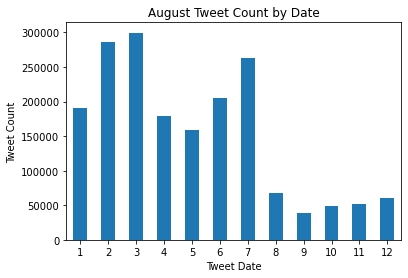

In [29]:
# Visualize tweet frequency by date
# get dates in the dataframe 
dates = aug_df["tweetcreatedts"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = aug_df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar();

plt.title("August Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

In [30]:
# How many languages are in this dataset
print(f"There are {aug_df['language'].nunique()} unique languages in this DataFrame.")
aug_df["language"].unique()

There are 66 unique languages in this DataFrame.


array(['en', 'es', 'zh', 'fr', 'el', 'pl', 'und', 'de', 'it', 'ja', 'nl',
       'ru', 'lv', 'ar', 'uk', 'tr', 'in', 'sr', 'sl', 'ro', 'th', 'fi',
       'pt', 'tl', 'ca', 'da', 'sv', 'ht', 'fa', 'et', 'ta', 'lt', 'hi',
       'iw', 'bn', 'ur', 'vi', 'is', 'cs', 'ko', 'kn', 'te', 'eu', 'no',
       'gu', 'ka', 'my', 'ps', 'bg', 'mr', 'hu', 'am', 'ml', 'cy', 'pa',
       'ckb', 'ne', 'si', 'hy', 'or', 'lo', 'bo', 'sd', 'km', 'ug', 'dv'],
      dtype=object)

In [31]:
# What percentage of the tweets is in English (en)
print(f"{round(aug_df.loc[aug_df['language']=='en'].shape[0]/aug_df.shape[0]*100, 2)}% of the tweets are in English.")

56.76% of the tweets are in English.


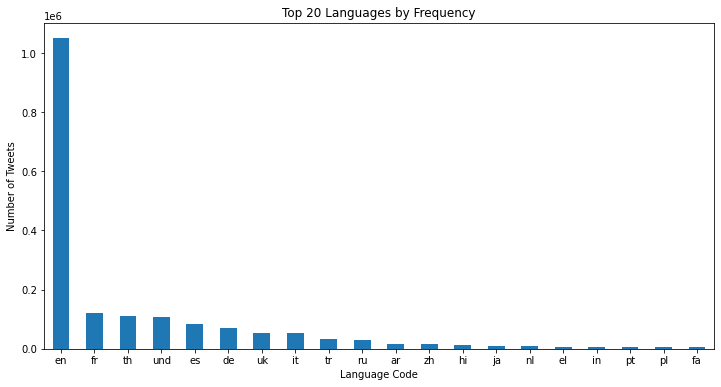

In [32]:
# Plot the distribution of different languages
language_counts = aug_df.groupby("language").size().sort_values(ascending=False)[0:20].plot.bar(figsize=(12,6),
                                                                                         title="Top 20 Languages by Frequency",
                                                                                         xlabel="Language Code",
                                                                                         ylabel="Number of Tweets",
                                                                                         rot=90
                                                                                         );

plt.xticks(rotation=0)
plt.show()

We can see that English (en) was by far the most prevalent language in this dataset, nearing 1.2 million tweets out of 1.96 million. The second and third most prevalent languages were French and Thai, respectively.

Note that the forth most prevalent language was "und", which is used to indicate that Twitter could not detect a language. We can safely inspect English language only.

In [33]:
# Inspect shortest and longest tweets
min_len = aug_df["text"].str.len().min()
max_len = aug_df["text"].str.len().max()


print(f"Shortest tweet has {min_len} chars.")
print(f"Longest tweet has {max_len} chars.")

Shortest tweet has 1 chars.
Longest tweet has 1027 chars.


Hold on, a tweet can have 280 characters max. How could one have more than the limit?

In [34]:
# get index of the tweet that has the max length
max_len_index = aug_df["text"].str.len().idxmax()
# pull out the text of that index
aug_df.loc[max_len_index, "text"]

73894    1xbet her zaman en iyisi ve en çok kazandıranı...
73894    📽️Fields of #Kherson Oblast, destroyed Russian...
73894    Every day more and more war crimes and terrori...
73894    🔴 VIDÉO - "Si la #Chine attaque, c'est la fin ...
73894    #ExpectUs Putin aka Hitler\n\n🇷🇺 Russian NTV T...
73894    "San Fermín, tres años después":\n\nhttps://t....
73894    @HashmatRuhul @mosad42027539 @SinghRakeshKu14 ...
Name: text, dtype: object

Upon research, mentions supposedly do not count toward the character limit when the tweet is a reply.

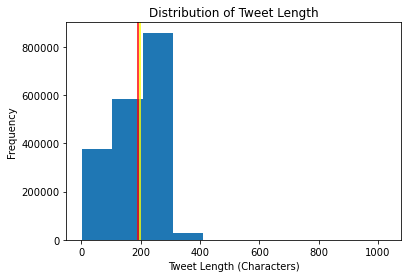

Mean: 192.23341690424374 chars
Median: 199.0 chars
Standard deviation: 86.09440823148087 chars


In [35]:
# Check the distribution of tweet lengths
tweet_len_series = aug_df["text"].str.len()
tweet_len_series.plot.hist();
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
# draw a vertical line for the mean
plt.axvline(x=tweet_len_series.mean(), color="red")
# draw a vertical line for the median
plt.axvline(x=tweet_len_series.median(), color="yellow")
plt.show()

print(f"Mean: {tweet_len_series.mean()} chars")
print(f"Median: {tweet_len_series.median()} chars")
print(f"Standard deviation: {tweet_len_series.std()} chars")

The distribution is right-skewed. Most tweets appear to be below 300 characers in length. But because we have a few outlying tweets that have anomalously long lengths, as investigated above, the histogram has an elongated x-axis

In [36]:
# Look closer on location in this dataset
print(f"There are {aug_df['location'].nunique()} unique locations in this DataFrame.")

There are 127675 unique locations in this DataFrame.


In [37]:
# Let see what locations users have in this dataset?
aug_df['location']

0        Nariman Point, Mumbai, India
1                         Facing East
2                   Cumana, Venezuela
3                          Mexico, ME
4                                 NaN
                     ...             
59740                   Lafayette, LA
59741              California, USA 🇺🇲
59742                      Cyberspace
59743               Tottenham, London
59744                             NaN
Name: location, Length: 1849926, dtype: object

In [38]:
# What is unique examples of locations?
aug_df['location'].unique()

array(['Nariman Point, Mumbai, India', 'Facing East', 'Cumana, Venezuela',
       ..., 'novi, michigan', 'The Peanut Gallery',
       'The dumbest possible timeline'], dtype=object)

As we can see, the location input wasn't formalized and even when users filled it, they fill it with some creative description of location as "Facing West" or "The Peanut Gallery", which don't give geografic information for us. Therefore, despite analizing correlation between twit's sentiment and autor's geografic location would be great idea, unfortunately we cannot realize it.

## Data Cleaning

In [8]:
# Check which columns have missing values
aug_df.isna().any()

userid                     False
username                   False
acctdesc                    True
location                    True
following                  False
followers                  False
totaltweets                False
usercreatedts              False
tweetid                    False
tweetcreatedts             False
retweetcount               False
text                       False
hashtags                   False
language                   False
coordinates                 True
favorite_count             False
is_retweet                 False
original_tweet_id          False
original_tweet_userid      False
original_tweet_username     True
in_reply_to_status_id      False
in_reply_to_user_id        False
in_reply_to_screen_name     True
is_quote_status            False
quoted_status_id           False
quoted_status_userid       False
quoted_status_username      True
extractedts                False
dtype: bool

Have missing values in following columns: 
* acctdesc (account description), 
* location, 
* coordinates, 
* original_tweet_username, 
* in_reply_to_screen_name,
* quoted_status_username 

acctdesc, original_tweet_username, in_reply_to_screen_name, quoted_status_username  columns contain information, we are not concerned at with this moment. For now, we will rely on the tweets to learn more about what kind of words are frequently used and the users' sentiments surrounding the war in Ukraine. Therefore, we will drop acctdesc column.

In [9]:
# Drop part of the columns with missing values
aug_df.drop("acctdesc", axis=1, inplace=True)
aug_df.drop("original_tweet_username", axis=1, inplace=True)
aug_df.drop("in_reply_to_screen_name", axis=1, inplace=True)
aug_df.drop("quoted_status_username", axis=1, inplace=True)
# confirm it has been dropped
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849926 entries, 0 to 59744
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   userid                 int64         
 1   username               object        
 2   location               object        
 3   following              int64         
 4   followers              int64         
 5   totaltweets            int64         
 6   usercreatedts          datetime64[ns]
 7   tweetid                int64         
 8   tweetcreatedts         datetime64[ns]
 9   retweetcount           int64         
 10  text                   object        
 11  hashtags               object        
 12  language               object        
 13  coordinates            object        
 14  favorite_count         int64         
 15  is_retweet             bool          
 16  original_tweet_id      int64         
 17  original_tweet_userid  int64         
 18  in_reply_to_status_id  i

In [10]:
# Drop the IDs columns as not important columns
aug_df.drop("userid", axis=1, inplace=True)
aug_df.drop("username", axis=1, inplace=True)
aug_df.drop("tweetid", axis=1, inplace=True)
aug_df.drop("original_tweet_id", axis=1, inplace=True)
aug_df.drop("original_tweet_userid", axis=1, inplace=True)
aug_df.drop("in_reply_to_status_id", axis=1, inplace=True)
aug_df.drop("in_reply_to_user_id", axis=1, inplace=True)
aug_df.drop("quoted_status_userid", axis=1, inplace=True)
aug_df.drop("quoted_status_id", axis=1, inplace=True)
# confirm it has been dropped
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849926 entries, 0 to 59744
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   location         object        
 1   following        int64         
 2   followers        int64         
 3   totaltweets      int64         
 4   usercreatedts    datetime64[ns]
 5   tweetcreatedts   datetime64[ns]
 6   retweetcount     int64         
 7   text             object        
 8   hashtags         object        
 9   language         object        
 10  coordinates      object        
 11  favorite_count   int64         
 12  is_retweet       bool          
 13  is_quote_status  bool          
 14  extractedts      datetime64[ns]
dtypes: bool(2), datetime64[ns](3), int64(5), object(5)
memory usage: 201.1+ MB


In [11]:
# Check which columns have missing values
aug_df.isna().any()

location            True
following          False
followers          False
totaltweets        False
usercreatedts      False
tweetcreatedts     False
retweetcount       False
text               False
hashtags           False
language           False
coordinates         True
favorite_count     False
is_retweet         False
is_quote_status    False
extractedts        False
dtype: bool

Columns location and coordinates could be important for prediction, but they have missing values.
Let's explore it further.

In [43]:
# Find null values
for column in aug_df.columns:
    print(f'Column {column} has {aug_df[column].isnull().sum()} null values')

Column location has 800249 null values
Column following has 0 null values
Column followers has 0 null values
Column totaltweets has 0 null values
Column usercreatedts has 0 null values
Column tweetcreatedts has 0 null values
Column retweetcount has 0 null values
Column text has 0 null values
Column hashtags has 0 null values
Column language has 0 null values
Column coordinates has 1847412 null values
Column favorite_count has 0 null values
Column is_retweet has 0 null values
Column is_quote_status has 0 null values
Column extractedts has 0 null values


Dataset has 1849926 rows
Column coordinates has 1847412 null values, therefore we have 2514 data here, which is nothing. We can safely remove this column as well.
Column location has 800249 null values, it means that we have data in more then million rows.

In [12]:
# Drop the coordinates column as it is practically empty
aug_df.drop("coordinates", axis=1, inplace=True)

Column location has 800249 null values, it means that we have data in more then million rows.
But we explored it in the EDA, ufortunately location data wosn't standartized and only can give us information about users' endless fantasy.

In [13]:
# Drop the location column as it is not containing useful information
aug_df.drop(columns=["location"], inplace=True)


In [46]:
# Check again which columns have missing values
aug_df.isna().any()

following          False
followers          False
totaltweets        False
usercreatedts      False
tweetcreatedts     False
retweetcount       False
text               False
hashtags           False
language           False
favorite_count     False
is_retweet         False
is_quote_status    False
extractedts        False
dtype: bool

In [14]:
# Remove the non-English tweets
eng_df=aug_df.loc[aug_df['language']=='en']
eng_df.head()

,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,is_retweet,is_quote_status,extractedts
0,51,3362,71331,2011-09-08 02:34:54,2022-08-01 00:00:00,0,The #RussiaUkraine conflict is being cast in b...,"[{'text': 'RussiaUkraine', 'indices': [4, 18]}...",en,0,False,False,2022-08-01 02:30:13.601013
1,2964,4669,119795,2017-07-06 15:28:29,2022-08-01 00:00:00,560,Remember when #NATO smashed #Yugoslavia into s...,"[{'text': 'NATO', 'indices': [14, 19]}, {'text...",en,0,True,False,2022-08-01 02:30:13.573250
4,49,8,112,2021-04-04 17:47:00,2022-08-01 00:00:01,0,"Hi #NATO , you have to understand that we are ...","[{'text': 'NATO', 'indices': [3, 8]}]",en,0,False,False,2022-08-01 06:59:10.496078
5,137,114789,315096,2010-08-20 11:19:22,2022-08-01 00:00:01,0,The world is in dire straits as it is not equi...,"[{'text': 'UkraineCrisis', 'indices': [133, 14...",en,1,False,False,2022-08-01 01:44:58.884242
6,27,3059,13665,2017-01-06 10:17:40,2022-08-01 00:00:01,0,Will the #sanctions imposed on #Russia cause a...,"[{'text': 'sanctions', 'indices': [9, 19]}, {'...",en,0,False,False,2022-08-01 05:13:47.957650


In [15]:
# get the shape of the new DataFrame
print(f"{eng_df.shape[0]} rows and {eng_df.shape[1]} columns")

1050085 rows and 13 columns


In [16]:
#Let's see what columns contain the useful for us information and check data types
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050085 entries, 0 to 59744
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   following        1050085 non-null  int64         
 1   followers        1050085 non-null  int64         
 2   totaltweets      1050085 non-null  int64         
 3   usercreatedts    1050085 non-null  datetime64[ns]
 4   tweetcreatedts   1050085 non-null  datetime64[ns]
 5   retweetcount     1050085 non-null  int64         
 6   text             1050085 non-null  object        
 7   hashtags         1050085 non-null  object        
 8   language         1050085 non-null  object        
 9   favorite_count   1050085 non-null  int64         
 10  is_retweet       1050085 non-null  bool          
 11  is_quote_status  1050085 non-null  bool          
 12  extractedts      1050085 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](3), int64(5), object(3)
memory u

Now no one column has missing values, but our dataset is still pretty big and has too many columns. 
Let's see, what can we remove else?

For our analysis we surely need the text column and time, when tweet created: tweetcreatedts.

We already extracted the English tweets only, so we don't need the language column anymore. 
Probably we don't need to know how many following and followers has user, his number of totaltweets 
and time when user was created: usercreatedts. Actually we don't need information about hashtags, 
retweetcount, how many people made this twit favorite_count, is_retweet or no, and is_quote_status: 
if users decided to quote something, that means that it is important for them. For our goal we can see 
retweets and quotes as any regular tweet, so should remove the information is it retweet or quote.

But considering that we could change our mind, we better save this variant of dataset, and extract the useful data from this dataset in the new one.

In [18]:
# Let's save the result
file_path = "/Users/olgapodolska/Desktop/UA_War_my/resources/aug_twitter_data.csv"
eng_df.to_csv(file_path, index=False)

In [19]:
# Extract text of twits and time, when they were created
text_df = eng_df[['tweetcreatedts', 'text']]

Let's see how looks data in that text column and what we need to do further

In [20]:
# show first 10 tweets
text_df["text"].head(10)

0     The #RussiaUkraine conflict is being cast in b...
1     Remember when #NATO smashed #Yugoslavia into s...
4     Hi #NATO , you have to understand that we are ...
5     The world is in dire straits as it is not equi...
6     Will the #sanctions imposed on #Russia cause a...
7     Owner of Ukraine's largest grain exporter kill...
8     Animal shelter Dogs and Cats, we need your hel...
9                                      eb5f211900p4ACC7
10    Why #Iran-#Russia relations likely won’t go be...
11    Crypto tattoos to the moon! Bitcoin and Doge i...
Name: text, dtype: object

The texts have URLs, emojis, mentions, hashtags, and HTML artifacts (e.g., \n). Uppercase and lowercase letters are also mixed.

Lowercase everything
Remove URLs and HTML artifacts (e.g., &amp, \n), hashtags, mentions, digits, and emojis
Remove punctuations

In [21]:
# Lowercase everything
text_df["cleaned_text"] = eng_df["text"].str.lower()
# check
text_df["cleaned_text"].head(10)

/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     the #russiaukraine conflict is being cast in b...
1     remember when #nato smashed #yugoslavia into s...
4     hi #nato , you have to understand that we are ...
5     the world is in dire straits as it is not equi...
6     will the #sanctions imposed on #russia cause a...
7     owner of ukraine's largest grain exporter kill...
8     animal shelter dogs and cats, we need your hel...
9                                      eb5f211900p4acc7
10    why #iran-#russia relations likely won’t go be...
11    crypto tattoos to the moon! bitcoin and doge i...
Name: cleaned_text, dtype: object

In [22]:
def remove_unnecessary(text):
    # INPUT: string (tweet)
    # OUTPUT: string without URLs, mentions, hashtags, digist, and emojis (and smileys)
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.NUMBER, p.OPT.EMOJI, p.OPT.SMILEY)
    result = p.clean(text)
    return result

text_df["cleaned_text"] = text_df["cleaned_text"].map(remove_unnecessary)
# check
text_df["cleaned_text"].head(10)

/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     the conflict is being cast in binaries, making...
1     remember when smashed into seven fragments? an...
4     hi , you have to understand that we are billio...
5     the world is in dire straits as it is not equi...
6     will the imposed on cause a significant shift ...
7     owner of ukraine's largest grain exporter kill...
8     animal shelter dogs and cats, we need your hel...
9                                      eb5f211900p4acc7
10    why - relations likely wont go beyond cooperat...
11    crypto tattoos to the moon! bitcoin and doge i...
Name: cleaned_text, dtype: object

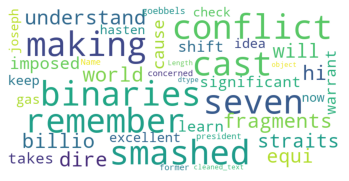

In [23]:
#remove StopWords and see the WordCloud
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(text_df['cleaned_text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Remove HTML Entities
As for removing HTML entities, the most frequent ones are "&amp" and "\n". We will replace these with empty string.

In [26]:
# replace "&amp" in tweets with empty string
text_df["cleaned_text"] = text_df["cleaned_text"].str.replace("&amp", "")

# replace "\n" in tweets with empty string
# may not be necessary after applying remove_unnecessary func
# feb_df["cleaned_text"] = feb_df["cleaned_text"].str.replace("\n", "")

# check
text_df.head(10)

/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweetcreatedts,text,cleaned_text
0,2022-08-01 00:00:00,The #RussiaUkraine conflict is being cast in b...,"the conflict is being cast in binaries, making..."
1,2022-08-01 00:00:00,Remember when #NATO smashed #Yugoslavia into s...,remember when smashed into seven fragments? an...
4,2022-08-01 00:00:01,"Hi #NATO , you have to understand that we are ...","hi , you have to understand that we are billio..."
5,2022-08-01 00:00:01,The world is in dire straits as it is not equi...,the world is in dire straits as it is not equi...
6,2022-08-01 00:00:01,Will the #sanctions imposed on #Russia cause a...,will the imposed on cause a significant shift ...
7,2022-08-01 00:00:01,Owner of Ukraine's largest grain exporter kill...,owner of ukraine's largest grain exporter kill...
8,2022-08-01 00:00:01,"Animal shelter Dogs and Cats, we need your hel...","animal shelter dogs and cats, we need your hel..."
9,2022-08-01 00:00:01,eb5f211900p4ACC7,eb5f211900p4acc7
10,2022-08-01 00:00:02,Why #Iran-#Russia relations likely won’t go be...,why - relations likely wont go beyond cooperat...
11,2022-08-01 00:00:02,Crypto tattoos to the moon! Bitcoin and Doge i...,crypto tattoos to the moon! bitcoin and doge i...


In [27]:
# remove punctuations using regex
# reference: https://stackoverflow.com/questions/68641923/remove-puncts-from-pandas-dataframe
text_df["cleaned_text"] = text_df['cleaned_text'].str.replace(r'[^0-9a-zA-Z\s]+', '', regex=True)

# check
text_df["cleaned_text"].head(15)

/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     the conflict is being cast in binaries making ...
1     remember when smashed into seven fragments and...
4     hi  you have to understand that we are billion...
5     the world is in dire straits as it is not equi...
6     will the imposed on cause a significant shift ...
7     owner of ukraines largest grain exporter kille...
8     animal shelter dogs and cats we need your help...
9                                      eb5f211900p4acc7
10    why  relations likely wont go beyond cooperati...
11    crypto tattoos to the moon bitcoin and doge in...
12                             its happening on live tv
14    will certainly lose any war with  they do not ...
16    serbian vucic is no good albanistan is no good...
17    animal shelter dogs and cats we need your help...
18    fm  adheres to the principled position whereby...
Name: cleaned_text, dtype: object

Due to working with the copy of a slice from a DataFrame the indexes are wrong, let's fix that.

In [28]:
# reset index
text_df.reset_index(inplace=True, drop=True)
# check
text_df.head()

,tweetcreatedts,text,cleaned_text
0,2022-08-01 00:00:00,The #RussiaUkraine conflict is being cast in b...,the conflict is being cast in binaries making ...
1,2022-08-01 00:00:00,Remember when #NATO smashed #Yugoslavia into s...,remember when smashed into seven fragments and...
2,2022-08-01 00:00:01,"Hi #NATO , you have to understand that we are ...",hi you have to understand that we are billion...
3,2022-08-01 00:00:01,The world is in dire straits as it is not equi...,the world is in dire straits as it is not equi...
4,2022-08-01 00:00:01,Will the #sanctions imposed on #Russia cause a...,will the imposed on cause a significant shift ...


In [29]:
# Drop the old text column as now we have all clean data in the cleaned text
text_df.drop(columns=["text"], inplace=True)

/Users/olgapodolska/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
# Check data types
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050085 entries, 0 to 1050084
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tweetcreatedts  1050085 non-null  datetime64[ns]
 1   cleaned_text    1050085 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.0+ MB


In [31]:
# check
text_df.head()

,tweetcreatedts,cleaned_text
0,2022-08-01 00:00:00,the conflict is being cast in binaries making ...
1,2022-08-01 00:00:00,remember when smashed into seven fragments and...
2,2022-08-01 00:00:01,hi you have to understand that we are billion...
3,2022-08-01 00:00:01,the world is in dire straits as it is not equi...
4,2022-08-01 00:00:01,will the imposed on cause a significant shift ...


In [33]:
# Saving cleaned data
file_path = "/Users/olgapodolska/Desktop/UA_War_my/resources/aug_twitter_data_cleaned.csv"
text_df.to_csv(file_path, index=False)